In [1]:
import pandas as pd

In [2]:
from fbprophet import Prophet

In [3]:
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: agg


In [4]:
df=pd.read_csv("/content/monthly_milk.csv")

In [5]:
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [6]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df.columns=['ds','y']

In [11]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [12]:
model=Prophet()

In [13]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [15]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
future=model.make_future_dataframe(periods=365)

In [17]:
forecast=model.predict(future)

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
528,1976-11-26,875.028496,804.357861,826.260487,870.412958,879.417956,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,0.0,0.0,0.0,815.347638
529,1976-11-27,875.046715,807.431295,829.873969,870.418677,879.448043,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,0.0,0.0,0.0,818.479106
530,1976-11-28,875.064935,810.581710,833.289710,870.425147,879.477768,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,0.0,0.0,0.0,821.790064
531,1976-11-29,875.083154,814.101042,835.892473,870.431617,879.508446,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,0.0,0.0,0.0,825.219679
532,1976-11-30,875.101374,818.093653,839.281223,870.417873,879.543045,-46.401460,-46.401460,-46.401460,-46.401460,-46.401460,-46.401460,0.0,0.0,0.0,828.699914


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.347638,804.357861,826.260487
529,1976-11-27,818.479106,807.431295,829.873969
530,1976-11-28,821.790064,810.581710,833.289710
531,1976-11-29,825.219679,814.101042,835.892473
532,1976-11-30,828.699914,818.093653,839.281223


In [20]:
fig1 = model.plot(forecast)

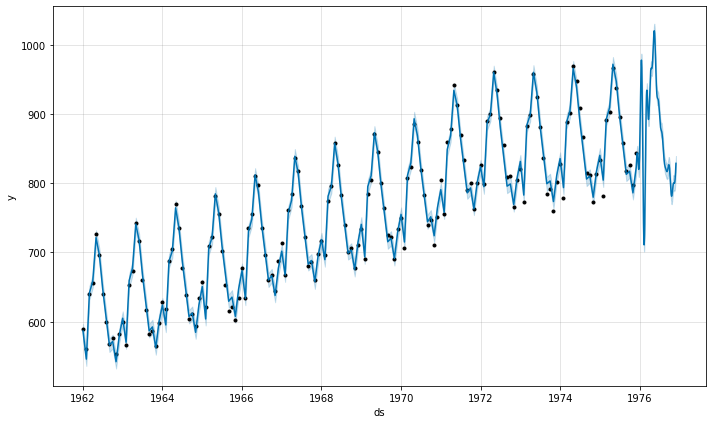

In [21]:
fig1

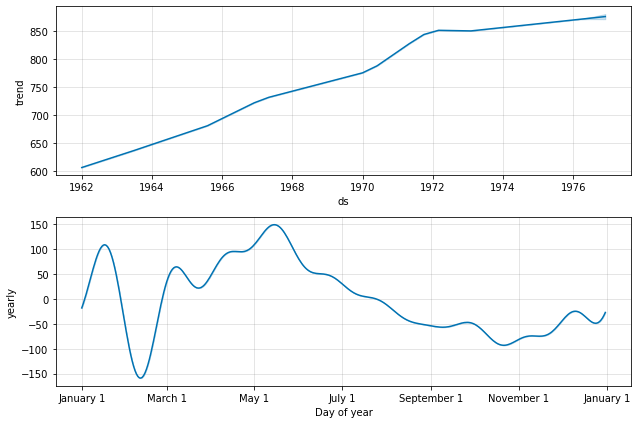

In [24]:
model.plot_components(forecast)

In [25]:
## Cross validation

In [26]:
df.shape

(168, 2)

In [27]:
forecast.shape

(533, 16)

In [28]:
from fbprophet.diagnostics import cross_validation

In [36]:
df_cv=cross_validation(model,horizon="365 days",period="180 days",initial="160")

INFO:fbprophet:Making 27 forecasts with cutoffs between 1962-02-07 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [37]:
df.shape

(168, 2)

In [40]:
forecast.shape

(533, 16)

In [38]:
df_cv.shape

(323, 6)

In [41]:
from fbprophet.diagnostics import performance_metrics

In [43]:
df_performance=performance_metrics(df_cv)

In [46]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,5.794601e+06,2407.197664,478.573875,0.828880,0.015609,0.312500
1,38 days,5.794596e+06,2407.196754,478.350147,0.828632,0.014300,0.343750
2,41 days,5.794556e+06,2407.188422,477.529642,0.827200,0.014300,0.343750
3,42 days,5.794569e+06,2407.191125,478.000435,0.827817,0.014749,0.328125
4,43 days,5.794582e+06,2407.193798,478.453931,0.828446,0.016469,0.312500


In [53]:
from fbprophet.plot import plot_cross_validation_metric

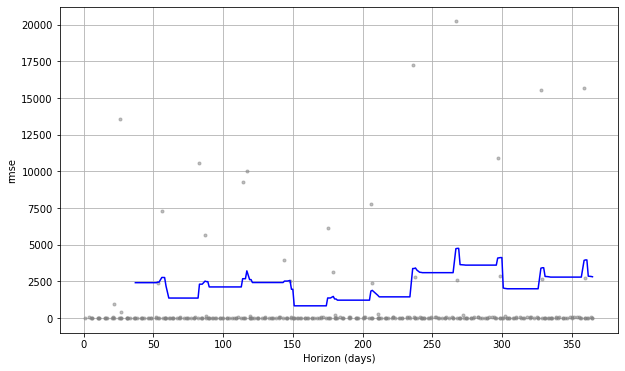

In [57]:
plot_cross_validation_metric(df_cv,metric="rmse")

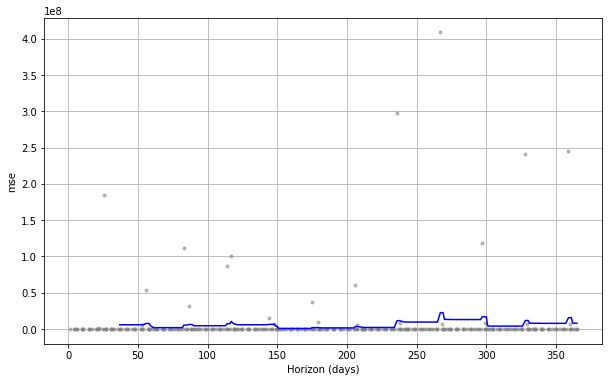

In [58]:
plot_cross_validation_metric(df_cv,metric="mse")

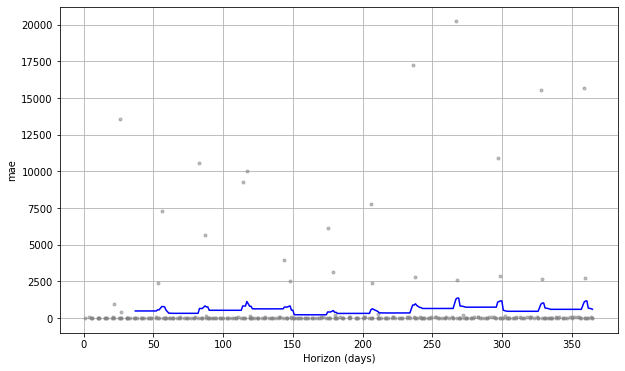

In [61]:
plot_cross_validation_metric(df_cv,metric="mae")